In [1]:
# slide 6 pg 11

In [2]:
import numpy as np
import pandas as pd
import control                   
import math
import cmath
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from control_utils import step_info

In [3]:
tfinal = 35;
rows = []
for T in [2, 1, 0.5, 0.1, 0.01, 0.0001]:
    Gz = control.c2d(control.tf(1, [1, 1, 0]), T)
    FTMFz = control.feedback(Gz, 1)    
    info = step_info(FTMFz, tfinal)
    rows.append([T]+[info[i] for i in info]+[control.pole(FTMFz)])
    
#todos os tempos estao em número de amostras
pd.DataFrame(rows, columns=['T']+[i for i in info]+['Poles'])

T         Mp      tp     ts5      ts2       tr      td  \
0  2.0000  63.392973  4.0000  32.000  34.0000  12.0000  2.0000   
1  1.0000  39.999686  3.0000  11.000  15.0000   4.0000  2.0000   
2  0.5000  28.644494  3.5000   7.500  10.5000   1.5000  1.5000   
3  0.1000  18.371165  3.6000   5.200   8.2000   1.6000  1.3000   
4  0.0100  16.501501  3.6200   5.280   8.0900   1.6400  1.3000   
5  0.0001  16.305324  3.6275   5.289   8.0765   1.6375  1.2941   

                                               Poles  
0  [(1.1102230246251565e-16+0.8540078650262973j),...  
1  [(0.49999999999999983+0.6181590077225745j), (0...  
2  [(0.7500000000000004+0.36638049913127635j), (0...  
3  [(0.9499999999999997+0.08376310760952053j), (0...  
4  [(0.9950000000000001+0.008631434556804537j), (...  
5  [(0.9999500000000002+8.659965423434158e-05j), ...

TransferFunction(array([0.36787944, 0.26424112]), array([ 1.        , -1.        ,  0.63212056]), 1)

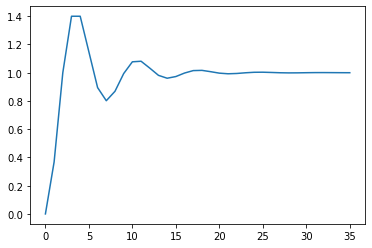

In [4]:
T=1
Gz = control.c2d(control.tf(1, [1, 1, 0]), T)
FTMFz = control.feedback(Gz, 1) 
x,y = control.step_response(FTMFz, 35)
plt.plot(x,y)
FTMFz